# Sparkによる機械学習デモ
## クラスタリングの実行


元ネタ：http://next.rikunabi.com/tech/docs/ct_s03600.jsp?p=002315<br>
第2問：「食べられるキノコはどれだ？」<br>
与えられたデータ点をクラスタに分類する、クラスタリング問題（教師なし学習）です<br>
教師なし学習（Unsupervised Learning）とは、分類済みのデータ（訓練データ）は前もって用意されておらず、与えられたデータだけからそのデータの構造や特徴を見出す手法です。クラスタ分類、主成分分析（PCA）などは教師なし学習の代表的な例です<br>


In [1]:
from pyspark.ml.clustering import KMeans
    
import numpy as np
from numpy import array

import brunel

In [2]:
if os.path.isfile("CodeIQ_data.txt") != True:
    !wget https://github.com/skngo/ws2017/raw/master/CodeIQ_data.zip
    !unzip -j  CodeIQ_data.zip
    !rm -rf CodeIQ_data.zip 
    print "Complete Unzip -> CodeIQ_data.txt."
else:
    print "CodeIQ_data.txt exists."

if os.path.isfile("CodeIQ_eaten.txt") != True:
    !wget https://github.com/skngo/ws2017/raw/master/CodeIQ_eaten.zip
    !unzip -j  CodeIQ_eaten.zip
    !rm -rf CodeIQ_eaten.zip 
    print "Complete Unzip -> CodeIQ_eaten.txt"
else:
    print "CodeIQ_eaten.txt exists."

CodeIQ_data.txt exists.
CodeIQ_eaten.txt exists.


<h2>正しいデータ（教師データ）をグラフ化します</h2>

In [3]:
fname = os.getcwd()  + "/CodeIQ_data.txt"
data = sqlContext.read.load(fname, format='com.databricks.spark.csv', header='false', inferSchema='true',delimiter =" ")
data.printSchema()
data.first()

root
 |-- _c0: double (nullable = true)
 |-- _c1: double (nullable = true)



Row(_c0=12.94, _c1=3.62)

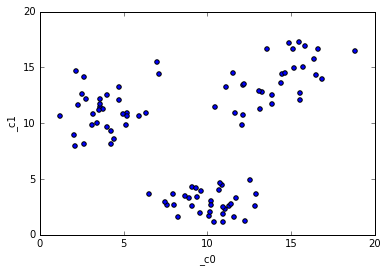

In [4]:
p_data = data.toPandas()

%matplotlib inline
p_data.plot(kind='scatter',x='_c0',y='_c1')

In [43]:
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.types import Row
from pyspark.ml.clustering import KMeans, KMeansModel

data1 = data.rdd.map(lambda r: Row(_c0 = r._c0,_c1 = r._c1,features = Vectors.dense(r._c0, r._c1))).toDF()

kmeans_estimator = KMeans().setFeaturesCol("features").setPredictionCol("prediction").setK(3)
model = kmeans_estimator.fit(data1)
predicted_df = model.transform(data1).drop("features")
predicted_df.printSchema()

predicted_df.filter(predicted_df["prediction"] == 1).count()


root
 |-- _c0: double (nullable = true)
 |-- _c1: double (nullable = true)
 |-- features: vector (nullable = true)

root
 |-- _c0: double (nullable = true)
 |-- _c1: double (nullable = true)
 |-- prediction: integer (nullable = true)



30